============================================================================================

# Extra Tree


============================================================================================


In [40]:
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)

In [41]:
import pandas as pd
import numpy as np
import os
import re
import time
import random
from matplotlib import pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

from sklearn.decomposition import PCA

import fns_models as fns


% matplotlib inline

from subprocess import check_output
print(check_output(["ls", "data"]).decode("utf-8"))

athenaeum_authors_preview.csv
athenaeum_painting_filtered.csv
athenaeum_paintings.csv
athenaeum_paintings_sizes.csv
color_histograms.csv
complete_data.csv
images
images_athenaeum
images_sizes_2325.csv
net_predicted.csv
painter_info_clean.csv
painting_info_clean.csv
resized_200
test_author200.csv
test_data.csv
test_hist_author_knn.csv
test_hist_author_rf.csv
train_author200.csv
train_data.csv
train_hist_author_knn.csv
train_hist_author_rf.csv



In [42]:
train, train_labels, test, test_labels = fns.get_top_author(3)


[INFO] The size of train histogram for Random Forest(49890, 34)
[INFO] The size of test histogram for Random Forest(12473, 34)
24      1369
1793    1338
368     1335
Name: author_id, dtype: int64
[trian above] ==================================================[test below]
24      342
1793    335
368     334
Name: author_id, dtype: int64
(4042,)
(4042, 34)


In [25]:
# Do not run it 
train = train.sample(10)
test = test.sample(7)
train_labels = train_labels.sample(10)
test_labels = test_labels.sample(7)

================================================================================================================

# Bayesian Optimization + Extra Tree

[bayesian-optimization](https://github.com/fmfn/BayesianOptimization/blob/master/bayes_opt/bayesian_optimization.py)

================================================================================================================

In [63]:
def extr_evaluate(max_features, max_depth, n_estimators):
    
    random.seed(2017)
#     params['max_features'] = int(max_features)
#     params['max_depth'] = int(max_depth)
#     params['n_estimators'] = int(n_estimators)
    
    extrc = ExtraTreesClassifier(n_jobs = 4, n_estimators=int(n_estimators), oob_score=True,
                                max_depth = int(max_depth), max_features = int(max_features),
                                random_state = 2017, bootstrap=True)
    #scores = cross_val_score(extrc, X=train, y = train_labels, cv=5, n_jobs = 2)
    
    # The mean score and the 95% confidence interval of the score estimate are hence given by:
    #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    #return scores.mean()
    extrc.fit(train, train_labels)
    return extrc.oob_score_

def extr_pca_evaluate(max_features,
                    max_depth,
                    n_estimators):
    
    
    extrc = ExtraTreesClassifier(n_jobs = 4, n_estimators=int(n_estimators), oob_score=True,
                                max_depth = int(max_depth), max_features = int(max_features),
                                random_state = 2017, bootstrap=True)
    
    extrc.fit(pca_transformed, train_labels)
    return extrc.oob_score_

def extr_bo(extr_fnc=extr_evaluate):
    start_time = time.time()
    num_iter = 25
    init_points = 5
    random_state = 2017
    # params = {
    #     #'eta': 0.1,
    #     #'silent': 1,
    #     'eval_metric': 'mae',
    #     'verbose_eval': True,
    #     #'seed': random_state
    # }

    extrBO = BayesianOptimization(extr_fnc, {'max_features': (5, 7),
                                             'max_depth': (2, 7),
                                             'n_estimators': (100, 900)})

    extrBO.maximize(init_points=init_points, n_iter=num_iter)
    
    print('-' * 53)
    print '\n%f' % (time.time() - start_time)
    
    print "Bayesian Optimization Best Score: %d" % extrBO.res['max']['max_val']

    print "Bayesian Optimization Best Parameters: %s" % str(extrBO.res['max']['max_params'])
    
    print (extrBO.res['max'])
    
#     fns.plot_bo(extr_fnc, extrBO)

#     print "Bayesian Optimization  Parameters: %s" % str(extrBO.res['all'])



In [44]:
# Run BO for color histogram
extr_bo(extr_evaluate)

Initialization
-----------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   max_features |   n_estimators | 
    1 | 00m01s |    0.63978 |      5.9959 |         6.5949 |       387.6933 | 
    2 | 00m01s |    0.66700 |      9.4831 |         5.4508 |       248.9311 | 
    3 | 00m03s |    0.67467 |      9.5938 |         6.5803 |       820.3952 | 
    4 | 00m01s |    0.62840 |      4.9289 |         5.4437 |       494.8356 | 
    5 | 00m02s |    0.65710 |      7.2597 |         6.4230 |       776.1727 | 
Bayesian Optimization
-----------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   max_features |   n_estimators | 
    6 | 00m09s |    0.60391 |      2.0850 |         5.8327 |       100.0313 | 
    7 | 00m07s |    0.60861 |      2.1468 |         6.1698 |       899.9912 | 
    8 | 00m06s |    0.67417 |      9.9866 |         6.5324 |       633.9424 | 
    9 | 00m05s | 

/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.13257467e-05]), 'nit': 3, 'funcalls': 45}
  " state: %s" % convergence_dict)


   16 | 00m08s |    0.67442 |      9.9658 |         6.8246 |       724.2127 | 
   17 | 00m07s |    0.67566 |      9.9812 |         6.8416 |       434.7020 | 
   18 | 00m08s |    0.67368 |      9.9863 |         5.0986 |       598.4945 | 
   19 | 00m09s |    0.67343 |      9.9601 |         6.6159 |       851.0331 | 
   20 | 00m06s |    0.66675 |      9.9880 |         6.9376 |       143.6844 | 
   21 | 00m08s |    0.67640 |      9.9525 |         6.9360 |       536.4571 | 
   22 | 00m11s |    0.67566 |      9.9513 |         6.7791 |       660.5319 | 
   23 | 00m11s |    0.66972 |      9.9886 |         5.0779 |       745.9886 | 
   24 | 00m11s |    0.67541 |      9.9925 |         6.6507 |       456.0467 | 
   25 | 00m14s |    0.67417 |      9.9771 |         6.6955 |       800.7933 | 
   26 | 00m13s |    0.67293 |      9.9632 |         5.1087 |       549.6350 | 
   27 | 00m14s |    0.67615 |      9.9436 |         6.8827 |       612.8869 | 
   28 | 00m12s |    0.67145 |      9.9737 |         

/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  4.37370127e-05]), 'nit': 6, 'funcalls': 60}
  " state: %s" % convergence_dict)


   29 | 00m14s |    0.67442 |      9.9569 |         6.9547 |       831.5898 | 
   30 | 00m14s |    0.67665 |      9.9664 |         6.9875 |       416.6458 | 
-----------------------------------------------------

246.496984
Bayesian Optimization Best Score: 0
Bayesian Optimization Best Parameters: {'max_features': 6.987536036161984, 'n_estimators': 416.64582986125163, 'max_depth': 9.9664012155221933}
{'max_val': 0.67664522513607128, 'max_params': {'max_features': 6.987536036161984, 'n_estimators': 416.64582986125163, 'max_depth': 9.9664012155221933}}


In [61]:
# Choose the best params from BO results then predict 
best_estimators = 416
best_max_depth = 6
best_max_features = 7
best_extrc = ExtraTreesClassifier(n_jobs = 4, n_estimators=best_estimators, oob_score=False,
                                max_depth = best_max_depth, max_features = best_max_features)

best_extrc.fit(train, train_labels)


# accuracy of trianing dataset
print "Accuracy of best Extra Tree model on train: %s" % str(best_extrc.score(train, train_labels))

# accuracy of testing dataset
print "Accuracy of best Extra Tree model on test: %s" % str(best_extrc.score(test, test_labels))


# use the best params to predict
extrc_true, extrc_pred = test_labels, best_extrc.predict(test)
extrc_pred

Accuracy of best Extra Tree model on train: 0.690747154874
Accuracy of best Extra Tree model on test: 0.671612265084


array([  24, 1793, 1793, ..., 1793,   24, 1793])

In [62]:
test_data_df = fns.result_table(extrc_true, extrc_pred)
test_data_df

,actual,predictions,results
33,24,24,True
34,1793,1793,True
35,1793,1793,True
37,1793,1793,True
101,1793,1793,True
102,1793,1793,True
105,1793,1793,True
217,1793,24,False
261,1793,1793,True
295,1793,1793,True


================================================================================================================

# PCA + Extra Tree

================================================================================================================

In [51]:
## Get 15 principal components
pca = PCA(n_components=15)
pca.fit(train)
pca_transformed = pca.transform(train)

pca_transformed_test = pca.transform(test)

0.96475902243110068

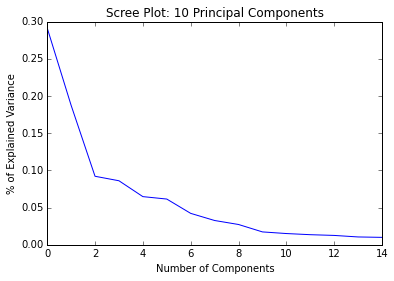

In [52]:
plt.plot(pca.explained_variance_ratio_)
plt.title("Scree Plot: 10 Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("% of Explained Variance")
sum(pca.explained_variance_ratio_)

In [53]:
# Run BO for pca of color histogram
extr_bo(extr_pca_evaluate)

Initialization
-----------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   max_features |   n_estimators | 
    1 | 00m03s |    0.64943 |      7.4445 |         5.8039 |       869.1985 | 
    2 | 00m03s |    0.66279 |      9.7668 |         6.2249 |       822.4185 | 
    3 | 00m01s |    0.62741 |      3.3319 |         6.6151 |       452.5464 | 
    4 | 00m02s |    0.64201 |      5.7320 |         6.7194 |       696.3192 | 
    5 | 00m02s |    0.64720 |      6.9967 |         5.3167 |       659.5947 | 
Bayesian Optimization
-----------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   max_features |   n_estimators | 
    6 | 00m08s |    0.66230 |     10.0000 |         5.0000 |       100.0000 | 
    7 | 00m05s |    0.65586 |      9.9376 |         5.0593 |       241.7723 | 
    8 | 00m04s |    0.60440 |      2.0030 |         6.6616 |       164.8930 | 
    9 | 00m05s | 

/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.12595349e-05]), 'nit': 5, 'funcalls': 48}
  " state: %s" % convergence_dict)


   21 | 00m12s |    0.65957 |      9.9843 |         5.1479 |       474.2450 | 
   22 | 00m13s |    0.66972 |     10.0000 |         7.0000 |       676.5496 | 
   23 | 00m12s |    0.66502 |      9.9998 |         6.7773 |       429.8514 | 


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -2.28806761e-05]), 'nit': 4, 'funcalls': 49}
  " state: %s" % convergence_dict)


   24 | 00m12s |    0.66625 |      9.9895 |         6.6714 |       527.6679 | 
   25 | 00m14s |    0.66106 |      9.9802 |         5.1827 |       686.2619 | 
   26 | 00m15s |    0.66230 |      9.9973 |         6.9656 |       844.8291 | 
   27 | 00m14s |    0.66378 |      9.9958 |         6.8871 |       784.8735 | 


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00033365]), 'nit': 5, 'funcalls': 52}
  " state: %s" % convergence_dict)


   28 | 00m13s |    0.66403 |      9.9294 |         6.9542 |       268.0828 | 
   29 | 00m14s |    0.66452 |      9.9809 |         6.9105 |       577.6078 | 
   30 | 00m13s |    0.66675 |      9.9588 |         6.9457 |       653.6138 | 
-----------------------------------------------------

267.982395
Bayesian Optimization Best Score: 0
Bayesian Optimization Best Parameters: {'max_features': 7.0, 'n_estimators': 676.54964329047209, 'max_depth': 10.0}
{'max_val': 0.66971796140524498, 'max_params': {'max_features': 7.0, 'n_estimators': 676.54964329047209, 'max_depth': 10.0}}


In [65]:
# Choose the best params from BO results then predict 
best_estimators = 677
best_max_depth = 6
best_max_features = 7
best_pca_extrc = ExtraTreesClassifier(n_jobs = 4, n_estimators=best_estimators, oob_score=False,
                                max_depth = best_max_depth, max_features = best_max_features)

best_pca_extrc.fit(pca_transformed, train_labels)

# accuracy of trianing dataset
print "Accuracy of best Extra Tree model on train: %s" % str(best_pca_extrc.score(pca_transformed, train_labels))

# accuracy of testing dataset
print "Accuracy of best Extra Tree model on test: %s" % str(best_pca_extrc.score(pca_transformed_test, test_labels))


# use the best params to predict
extrc_pca_true, extrc_pca_pred = test_labels, best_pca_extrc.predict(pca_transformed_test)
extrc_pca_pred

Accuracy of best Extra Tree model on train: 0.68654131618
Accuracy of best Extra Tree model on test: 0.672601384768


array([  24, 1793, 1793, ..., 1793,   24, 1793])

In [66]:
# accuracy of training dataset
best_pca_extrc.score(pca_transformed, train_labels)

0.68654131618010883

In [67]:
# accuracy of testing dataset
best_pca_extrc.score(pca_transformed_test, test_labels)

0.67260138476755682

In [68]:
test_data_df = fns.result_table(extrc_pca_true, extrc_pca_pred)
test_data_df

,actual,predictions,results
33,24,24,True
34,1793,1793,True
35,1793,1793,True
37,1793,24,False
101,1793,1793,True
102,1793,1793,True
105,1793,1793,True
217,1793,24,False
261,1793,1793,True
295,1793,1793,True
